In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
abalone = pd.read_csv(r'Data/abalone.data', header=None)

In [2]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]


In [5]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone = abalone.drop("Sex", axis=1)

In [7]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


 The target variable is Rings, so i can start with that. A histogram will give to me a quick overview of the age ranges .

 The histogram shows that most abalones in the dataset have between five and fifteen rings, but that it’s possible to get up to twenty-five rings. The older abalones are underrepresented in this dataset. This seems intuitive, as age distributions are generally skewed like this due to natural processes.

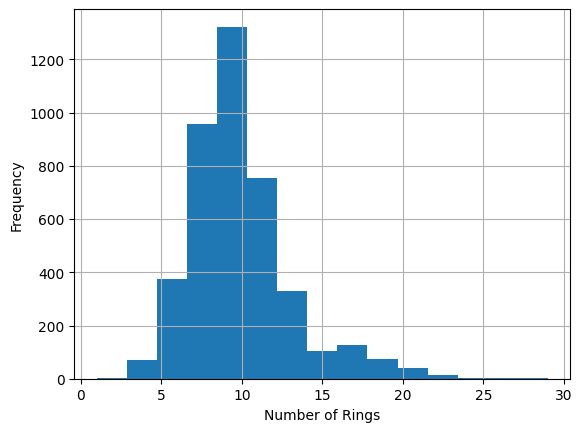

In [10]:
abalone["Rings"].hist(bins=15)
plt.xlabel("Number of Rings")
plt.ylabel("Frequency")
plt.show()

## correlation with the age

In [11]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# KNN
```text
* The kNN algorithm is a little bit atypical as compared to other machine learning algorithms. As you saw earlier, each machine learning model has its specific formula that needs to be estimated. The specificity of the k-Nearest Neighbors algorithm is that this formula is computed not at the moment of fitting but rather at the moment of prediction. This isn’t the case for most other models.

* When a new data point arrives, the kNN algorithm, as the name indicates, will start by finding the nearest neighbors of this new data point. Then it takes the values of those neighbors and uses them as a prediction for the new data point.

* As an intuitive example of why this works, think of your neighbors. Your neighbors are often relatively similar to you. They’re probably in the same socioeconomic class as you. Maybe they have the same type of work as you, maybe their children go to the same school as yours, and so on. But for some tasks, this kind of approach is not as useful. For instance, it wouldn’t make any sense to look at your neighbor’s favorite color to predict yours.

* The kNN algorithm is based on the notion that you can predict the features of a data point based on the features of its neighbors. In some cases, this method of prediction may be successful, while in other cases it may not. Next, you’ll look at the mathematical description of “nearest” for data points and the methods to combine multiple neighbors into one prediction.
```

# Define “Nearest” Using a Mathematical Definition of Distance

 ``` text
  To find the data points that are closest to the point that you need to predict, you can use a mathematical definition of distance called Euclidean distance.
```

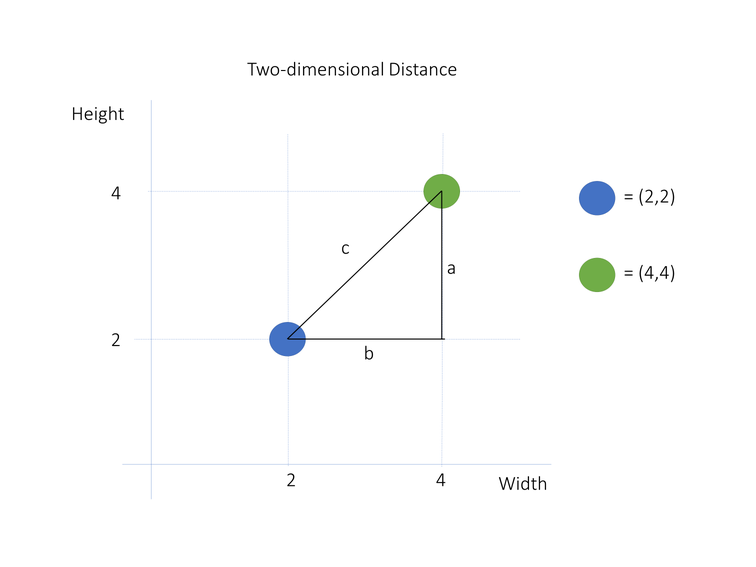


``` text
  In this picture, you see two data points: blue at (2,2) and green at (4,4). To compute the distance between them, you can start by adding two vectors.
  Vector a goes from point (4,2) to point (4,4), and vector b goes from point (4,2) to point (2,2). 
  Their heads are indicated by the colored points.
  Note that they are at a 90 degree  angle.

  The difference between these vectors is the vector c, which goes from the head of vector a to the head of vector b. The length of vector c represents
  the distance between your two data points.

  The length of a vector is called the norm. The norm is a positive value that indicates the magnitude of the vector. 
  compute the norm of a vector using the Euclidean formula:
```

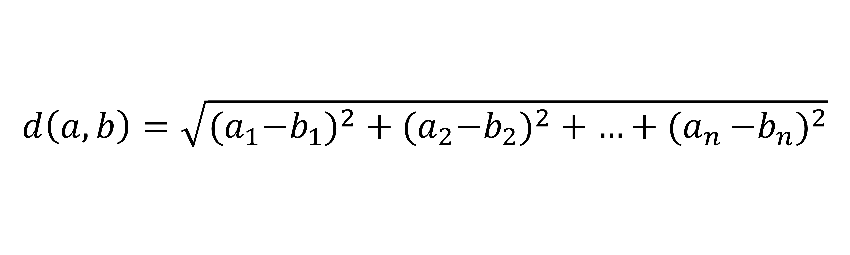



# compute the norm 

In [13]:
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

### pandas DataFrame into a NumPy array using

In [14]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [15]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [17]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

## apply a kNN with k = 3 on a new abalone that has the following physical measurements:

``` text
Variable	  Value

Length	        0.569552
Diameter	0.446407
Height	        0.154437
Whole weight	1.016849
Shucked weight	0.439051
Viscera weight	0.222526
Shell weight	0.291208
```

In [18]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

### compute the distances between this new data point and each of the data points in the Abalone Dataset 

In [20]:
distances = np.linalg.norm(X - new_data_point, axis=1)
distances

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307])

### find out which are the three closest neighbors.
* use a method called .argsort() to sort the array from lowest to highest, and you can take the first k elements to obtain the indices of the k nearest neighbors:

In [21]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids


array([4045, 1902, 1644], dtype=int64)

### get rings for the three nearest neighbors

In [22]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

### Average for Regression
```text
 In regression problems, the target variable is numeric.
 You combine multiple neighbors into one prediction by taking the average of their values of the target variable. 
 
```

In [24]:
prediction = nearest_neighbor_rings.mean()
prediction

10.0

# Mode for Classification
``` text
  In classification problems, the target variable is categorical

  in the case of classification, you take the mode. The mode is the value that occurs most often. 
  This means that you count the classes of all the neighbors, and you retain the most common class.
  The prediction is the value that occurs most often among the neighbors.

  If there are multiple modes, there are multiple possible solutions. You could select a final winner randomly from the winners. 
  You could also make the final decision based on the distances of the neighbors, in which case the mode of the closest neighbors would be retained.

  You can compute the mode using the SciPy mode() function. 
```

